#  Daily Total Female Births in California, 1959
#### Kaggle Dataset

## Contents

### 1) Importing Libraries
### 2) Loading Dataset
### 3) Exploring Data
### 4) Plotting Data
### 5) Creating Forecast
### 6) Evaluating Forecast

In [69]:
# 1) Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
#2) Loading the dataset
fb = pd.read_csv(r"C:\Users\admin\Desktop\Female Birth California 1959\daily-total-female-births-CA.csv")

In [71]:
#3) Exploring Data
fb.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [72]:
fb.shape

(365, 2)

In [73]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
date      365 non-null object
births    365 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [74]:
fb.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


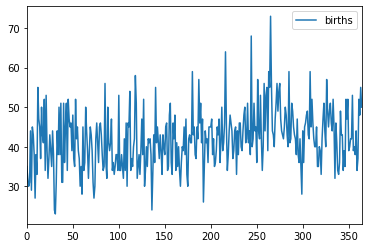

In [75]:
#4) Plotting the data
fb.plot()

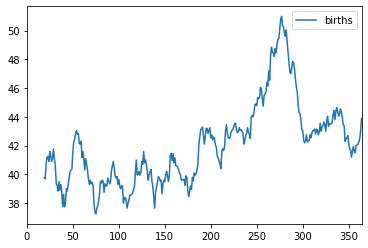

In [76]:
fb_mean = fb.rolling(window = 20).mean()
fb_mean.plot()

In [77]:
fb.columns

Index(['date', 'births'], dtype='object')

In [78]:
# Dropping Dates for creating forecasts
fb_df = fb.drop('date',axis=1)
fb_df.head()

,births
0,35
1,32
2,30
3,31
4,44


In [80]:
# 5)  Creating the actual and forecasted results by concatenating the dataframe
fb_int = pd.concat([fb_df, fb_df.shift(1)], axis=1)
fb_int.head()

,births,births
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [82]:
# Renaming the columns
fb_int.columns = ['Actual births', 'Forecasted births']
fb_int.head()

,Actual births,Forecasted births
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [83]:
fb_int.drop(0, axis=0, inplace=True)
fb_int.head()

,Actual births,Forecasted births
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [84]:
fb_int.tail()

,Actual births,Forecasted births
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [97]:
# 6) Evaluating the forecast
# Calculating Mean Squared error between the actual births and forecasted births
from sklearn.metrics import mean_squared_error
fb_mse = mean_squared_error(fb_int['Actual births'], fb_int['Forecasted births'])
print("The Mean Squared Error is {:.2f}".format(fb_mse))

The Mean Squared Error is 84.22


In [98]:
# Calculating RMSE value
fb_rmse = np.sqrt(fb_mse)
print("The Root Mean Squared Error is {:.2f}".format(fb_rmse))

The Root Mean Squared Error is 9.18
